<a href="https://colab.research.google.com/github/HAfli/CS231n/blob/master/Demo_Lecture_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Networks in Python with Keras from Tensorflow


This example uses the ``keras`` package from ``tensorflow`` to build neural networks for machine learning tasks.
[link text](https://colab.research.google.com/drive/1DzuHE4DXHHTwRQqsdqsRzlfpkk7fn59B?usp=sharing)

### Package Imports


In [93]:
# General data handling
import pandas as pd
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 200)
import numpy as np
import random

# Drawing plots
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# More plots
import seaborn as sns

# Image maniupulation
import PIL

# Machine learning
import sklearn.tree
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing

# Neural networks
import tensorflow.keras
import tensorflow.keras.models
import tensorflow.keras.layers
import tensorflow.keras.utils

# Deployment
import gradio as gr

You can mount your Google Drive using the drive module from google.colab. This will require you to authenticate with your Google account to give Colab access to your drive.

In [94]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Preparation

In this example we use a famous image dataset, the ``mnist_medium.csv`` dataset, where the challenge is to recognise the number in an image of a hand-written digit.

#### Load a Dataset

First we read in a dataset.

In [95]:
development_dataset_filename = "/content/drive/My Drive/Demo_Lecture/Data/mnist_medium.csv"
target_feature_name = 'label'

In [96]:
dataset = pd.read_csv(development_dataset_filename)
print(dataset.shape)

(36000, 785)


In [97]:
print(dataset.columns.to_list())
display(dataset.head())
display(dataset.tail())

['label', 'Px0', 'Px1', 'Px2', 'Px3', 'Px4', 'Px5', 'Px6', 'Px7', 'Px8', 'Px9', 'Px10', 'Px11', 'Px12', 'Px13', 'Px14', 'Px15', 'Px16', 'Px17', 'Px18', 'Px19', 'Px20', 'Px21', 'Px22', 'Px23', 'Px24', 'Px25', 'Px26', 'Px27', 'Px28', 'Px29', 'Px30', 'Px31', 'Px32', 'Px33', 'Px34', 'Px35', 'Px36', 'Px37', 'Px38', 'Px39', 'Px40', 'Px41', 'Px42', 'Px43', 'Px44', 'Px45', 'Px46', 'Px47', 'Px48', 'Px49', 'Px50', 'Px51', 'Px52', 'Px53', 'Px54', 'Px55', 'Px56', 'Px57', 'Px58', 'Px59', 'Px60', 'Px61', 'Px62', 'Px63', 'Px64', 'Px65', 'Px66', 'Px67', 'Px68', 'Px69', 'Px70', 'Px71', 'Px72', 'Px73', 'Px74', 'Px75', 'Px76', 'Px77', 'Px78', 'Px79', 'Px80', 'Px81', 'Px82', 'Px83', 'Px84', 'Px85', 'Px86', 'Px87', 'Px88', 'Px89', 'Px90', 'Px91', 'Px92', 'Px93', 'Px94', 'Px95', 'Px96', 'Px97', 'Px98', 'Px99', 'Px100', 'Px101', 'Px102', 'Px103', 'Px104', 'Px105', 'Px106', 'Px107', 'Px108', 'Px109', 'Px110', 'Px111', 'Px112', 'Px113', 'Px114', 'Px115', 'Px116', 'Px117', 'Px118', 'Px119', 'Px120', 'Px121', 'P

,label,Px0,Px1,Px2,Px3,Px4,Px5,Px6,Px7,Px8,Px9,Px10,Px11,Px12,Px13,Px14,Px15,Px16,Px17,Px18,Px19,Px20,Px21,Px22,Px23,Px24,Px25,Px26,Px27,Px28,Px29,Px30,Px31,Px32,Px33,Px34,Px35,Px36,Px37,Px38,Px39,Px40,Px41,Px42,Px43,Px44,Px45,Px46,Px47,Px48,Px49,Px50,Px51,Px52,Px53,Px54,Px55,Px56,Px57,Px58,Px59,Px60,Px61,Px62,Px63,Px64,Px65,Px66,Px67,Px68,Px69,Px70,Px71,Px72,Px73,Px74,Px75,Px76,Px77,Px78,Px79,Px80,Px81,Px82,Px83,Px84,Px85,Px86,Px87,Px88,Px89,Px90,Px91,Px92,Px93,Px94,Px95,Px96,Px97,Px98,Px99,Px100,Px101,Px102,Px103,Px104,Px105,Px106,Px107,Px108,Px109,Px110,Px111,Px112,Px113,Px114,Px115,Px116,Px117,Px118,Px119,Px120,Px121,Px122,Px123,Px124,Px125,Px126,Px127,Px128,Px129,Px130,Px131,Px132,Px133,Px134,Px135,Px136,Px137,Px138,Px139,Px140,Px141,Px142,Px143,Px144,Px145,Px146,Px147,Px148,Px149,Px150,Px151,Px152,Px153,Px154,Px155,Px156,Px157,Px158,Px159,Px160,Px161,Px162,Px163,Px164,Px165,Px166,Px167,Px168,Px169,Px170,Px171,Px172,Px173,Px174,Px175,Px176,Px177,Px178,Px179,Px180,Px181,Px182,Px183,Px184,Px185,Px186,Px187,Px188,Px189,Px190,Px191,Px192,Px193,Px194,Px195,Px196,Px197,Px198,Px199,Px200,Px201,Px202,Px203,Px204,Px205,Px206,Px207,Px208,Px209,Px210,Px211,Px212,Px213,Px214,Px215,Px216,Px217,Px218,Px219,Px220,Px221,Px222,Px223,Px224,Px225,Px226,Px227,Px228,Px229,Px230,Px231,Px232,Px233,Px234,Px235,Px236,Px237,Px238,Px239,Px240,Px241,Px242,Px243,Px244,Px245,Px246,Px247,Px248,Px249,Px250,Px251,Px252,Px253,Px254,Px255,Px256,Px257,Px258,Px259,Px260,Px261,Px262,Px263,Px264,Px265,Px266,Px267,Px268,Px269,Px270,Px271,Px272,Px273,Px274,Px275,Px276,Px277,Px278,Px279,Px280,Px281,Px282,Px283,Px284,Px285,Px286,Px287,Px288,Px289,Px290,Px291,Px292,Px293,Px294,Px295,Px296,Px297,Px298,Px299,Px300,Px301,Px302,Px303,Px304,Px305,Px306,Px307,Px308,Px309,Px310,Px311,Px312,Px313,Px314,Px315,Px316,Px317,Px318,Px319,Px320,Px321,Px322,Px323,Px324,Px325,Px326,Px327,Px328,Px329,Px330,Px331,Px332,Px333,Px334,Px335,Px336,Px337,Px338,Px339,Px340,Px341,Px342,Px343,Px344,Px345,Px346,Px347,Px348,Px349,Px350,Px351,Px352,Px353,Px354,Px355,Px356,Px357,Px358,Px359,Px360,Px361,Px362,Px363,Px364,Px365,Px366,Px367,Px368,Px369,Px370,Px371,Px372,Px373,Px374,Px375,Px376,Px377,Px378,Px379,Px380,Px381,Px382,Px383,Px384,Px385,Px386,Px387,Px388,Px389,Px390,Px391,Px392,Px393,Px394,Px395,Px396,Px397,Px398,Px399,Px400,Px401,Px402,Px403,Px404,Px405,Px406,Px407,Px408,Px409,Px410,Px411,Px412,Px413,Px414,Px415,Px416,Px417,Px418,Px419,Px420,Px421,Px422,Px423,Px424,Px425,Px426,Px427,Px428,Px429,Px430,Px431,Px432,Px433,Px434,Px435,Px436,Px437,Px438,Px439,Px440,Px441,Px442,Px443,Px444,Px445,Px446,Px447,Px448,Px449,Px450,Px451,Px452,Px453,Px454,Px455,Px456,Px457,Px458,Px459,Px460,Px461,Px462,Px463,Px464,Px465,Px466,Px467,Px468,Px469,Px470,Px471,Px472,Px473,Px474,Px475,Px476,Px477,Px478,Px479,Px480,Px481,Px482,Px483,Px484,Px485,Px486,Px487,Px488,Px489,Px490,Px491,Px492,Px493,Px494,Px495,Px496,Px497,Px498,Px499,Px500,Px501,Px502,Px503,Px504,Px505,Px506,Px507,Px508,Px509,Px510,Px511,Px512,Px513,Px514,Px515,Px516,Px517,Px518,Px519,Px520,Px521,Px522,Px523,Px524,Px525,Px526,Px527,Px528,Px529,Px530,Px531,Px532,Px533,Px534,Px535,Px536,Px537,Px538,Px539,Px540,Px541,Px542,Px543,Px544,Px545,Px546,Px547,Px548,Px549,Px550,Px551,Px552,Px553,Px554,Px555,Px556,Px557,Px558,Px559,Px560,Px561,Px562,Px563,Px564,Px565,Px566,Px567,Px568,Px569,Px570,Px571,Px572,Px573,Px574,Px575,Px576,Px577,Px578,Px579,Px580,Px581,Px582,Px583,Px584,Px585,Px586,Px587,Px588,Px589,Px590,Px591,Px592,Px593,Px594,Px595,Px596,Px597,Px598,Px599,Px600,Px601,Px602,Px603,Px604,Px605,Px606,Px607,Px608,Px609,Px610,Px611,Px612,Px613,Px614,Px615,Px616,Px617,Px618,Px619,Px620,Px621,Px622,Px623,Px624,Px625,Px626,Px627,Px628,Px629,Px630,Px631,Px632,Px633,Px634,Px635,Px636,Px637,Px638,Px639,Px640,Px641,Px642,Px643,Px644,Px645,Px646,Px647,Px648,Px649,Px650,Px651,Px652,Px653,Px654,Px655,Px656,Px657,Px658,Px659,Px660,Px661,Px662,Px663,Px664,Px665,Px666,Px667,Px668,Px669,Px670,Px671,Px672,Px673,Px674,Px675,Px676,Px677,Px678,Px679,Px680,Px681,Px682,Px683

,label,Px0,Px1,Px2,Px3,Px4,Px5,Px6,Px7,Px8,Px9,Px10,Px11,Px12,Px13,Px14,Px15,Px16,Px17,Px18,Px19,Px20,Px21,Px22,Px23,Px24,Px25,Px26,Px27,Px28,Px29,Px30,Px31,Px32,Px33,Px34,Px35,Px36,Px37,Px38,Px39,Px40,Px41,Px42,Px43,Px44,Px45,Px46,Px47,Px48,Px49,Px50,Px51,Px52,Px53,Px54,Px55,Px56,Px57,Px58,Px59,Px60,Px61,Px62,Px63,Px64,Px65,Px66,Px67,Px68,Px69,Px70,Px71,Px72,Px73,Px74,Px75,Px76,Px77,Px78,Px79,Px80,Px81,Px82,Px83,Px84,Px85,Px86,Px87,Px88,Px89,Px90,Px91,Px92,Px93,Px94,Px95,Px96,Px97,Px98,Px99,Px100,Px101,Px102,Px103,Px104,Px105,Px106,Px107,Px108,Px109,Px110,Px111,Px112,Px113,Px114,Px115,Px116,Px117,Px118,Px119,Px120,Px121,Px122,Px123,Px124,Px125,Px126,Px127,Px128,Px129,Px130,Px131,Px132,Px133,Px134,Px135,Px136,Px137,Px138,Px139,Px140,Px141,Px142,Px143,Px144,Px145,Px146,Px147,Px148,Px149,Px150,Px151,Px152,Px153,Px154,Px155,Px156,Px157,Px158,Px159,Px160,Px161,Px162,Px163,Px164,Px165,Px166,Px167,Px168,Px169,Px170,Px171,Px172,Px173,Px174,Px175,Px176,Px177,Px178,Px179,Px180,Px181,Px182,Px183,Px184,Px185,Px186,Px187,Px188,Px189,Px190,Px191,Px192,Px193,Px194,Px195,Px196,Px197,Px198,Px199,Px200,Px201,Px202,Px203,Px204,Px205,Px206,Px207,Px208,Px209,Px210,Px211,Px212,Px213,Px214,Px215,Px216,Px217,Px218,Px219,Px220,Px221,Px222,Px223,Px224,Px225,Px226,Px227,Px228,Px229,Px230,Px231,Px232,Px233,Px234,Px235,Px236,Px237,Px238,Px239,Px240,Px241,Px242,Px243,Px244,Px245,Px246,Px247,Px248,Px249,Px250,Px251,Px252,Px253,Px254,Px255,Px256,Px257,Px258,Px259,Px260,Px261,Px262,Px263,Px264,Px265,Px266,Px267,Px268,Px269,Px270,Px271,Px272,Px273,Px274,Px275,Px276,Px277,Px278,Px279,Px280,Px281,Px282,Px283,Px284,Px285,Px286,Px287,Px288,Px289,Px290,Px291,Px292,Px293,Px294,Px295,Px296,Px297,Px298,Px299,Px300,Px301,Px302,Px303,Px304,Px305,Px306,Px307,Px308,Px309,Px310,Px311,Px312,Px313,Px314,Px315,Px316,Px317,Px318,Px319,Px320,Px321,Px322,Px323,Px324,Px325,Px326,Px327,Px328,Px329,Px330,Px331,Px332,Px333,Px334,Px335,Px336,Px337,Px338,Px339,Px340,Px341,Px342,Px343,Px344,Px345,Px346,Px347,Px348,Px349,Px350,Px351,Px352,Px353,Px354,Px355,Px356,Px357,Px358,Px359,Px360,Px361,Px362,Px363,Px364,Px365,Px366,Px367,Px368,Px369,Px370,Px371,Px372,Px373,Px374,Px375,Px376,Px377,Px378,Px379,Px380,Px381,Px382,Px383,Px384,Px385,Px386,Px387,Px388,Px389,Px390,Px391,Px392,Px393,Px394,Px395,Px396,Px397,Px398,Px399,Px400,Px401,Px402,Px403,Px404,Px405,Px406,Px407,Px408,Px409,Px410,Px411,Px412,Px413,Px414,Px415,Px416,Px417,Px418,Px419,Px420,Px421,Px422,Px423,Px424,Px425,Px426,Px427,Px428,Px429,Px430,Px431,Px432,Px433,Px434,Px435,Px436,Px437,Px438,Px439,Px440,Px441,Px442,Px443,Px444,Px445,Px446,Px447,Px448,Px449,Px450,Px451,Px452,Px453,Px454,Px455,Px456,Px457,Px458,Px459,Px460,Px461,Px462,Px463,Px464,Px465,Px466,Px467,Px468,Px469,Px470,Px471,Px472,Px473,Px474,Px475,Px476,Px477,Px478,Px479,Px480,Px481,Px482,Px483,Px484,Px485,Px486,Px487,Px488,Px489,Px490,Px491,Px492,Px493,Px494,Px495,Px496,Px497,Px498,Px499,Px500,Px501,Px502,Px503,Px504,Px505,Px506,Px507,Px508,Px509,Px510,Px511,Px512,Px513,Px514,Px515,Px516,Px517,Px518,Px519,Px520,Px521,Px522,Px523,Px524,Px525,Px526,Px527,Px528,Px529,Px530,Px531,Px532,Px533,Px534,Px535,Px536,Px537,Px538,Px539,Px540,Px541,Px542,Px543,Px544,Px545,Px546,Px547,Px548,Px549,Px550,Px551,Px552,Px553,Px554,Px555,Px556,Px557,Px558,Px559,Px560,Px561,Px562,Px563,Px564,Px565,Px566,Px567,Px568,Px569,Px570,Px571,Px572,Px573,Px574,Px575,Px576,Px577,Px578,Px579,Px580,Px581,Px582,Px583,Px584,Px585,Px586,Px587,Px588,Px589,Px590,Px591,Px592,Px593,Px594,Px595,Px596,Px597,Px598,Px599,Px600,Px601,Px602,Px603,Px604,Px605,Px606,Px607,Px608,Px609,Px610,Px611,Px612,Px613,Px614,Px615,Px616,Px617,Px618,Px619,Px620,Px621,Px622,Px623,Px624,Px625,Px626,Px627,Px628,Px629,Px630,Px631,Px632,Px633,Px634,Px635,Px636,Px637,Px638,Px639,Px640,Px641,Px642,Px643,Px644,Px645,Px646,Px647,Px648,Px649,Px650,Px651,Px652,Px653,Px654,Px655,Px656,Px657,Px658,Px659,Px660,Px661,Px662,Px663,Px664,Px665,Px666,Px667,Px668,Px669,Px670,Px671,Px672,Px673,Px674,Px675,Px676,Px677,Px678,Px679,Px680,Px681,Px682,Px683

To make this notebook run a bit faster we sub-sample the dataset using the ``sample`` function from ``pandas``. For the ``sample`` function we simply pass the fraction of the data we want to keep.

In [98]:
dataset = dataset.sample(frac=0.5)
print(dataset.shape)
display(dataset.head())

(18000, 785)


,label,Px0,Px1,Px2,Px3,Px4,Px5,Px6,Px7,Px8,Px9,Px10,Px11,Px12,Px13,Px14,Px15,Px16,Px17,Px18,Px19,Px20,Px21,Px22,Px23,Px24,Px25,Px26,Px27,Px28,Px29,Px30,Px31,Px32,Px33,Px34,Px35,Px36,Px37,Px38,Px39,Px40,Px41,Px42,Px43,Px44,Px45,Px46,Px47,Px48,Px49,Px50,Px51,Px52,Px53,Px54,Px55,Px56,Px57,Px58,Px59,Px60,Px61,Px62,Px63,Px64,Px65,Px66,Px67,Px68,Px69,Px70,Px71,Px72,Px73,Px74,Px75,Px76,Px77,Px78,Px79,Px80,Px81,Px82,Px83,Px84,Px85,Px86,Px87,Px88,Px89,Px90,Px91,Px92,Px93,Px94,Px95,Px96,Px97,Px98,Px99,Px100,Px101,Px102,Px103,Px104,Px105,Px106,Px107,Px108,Px109,Px110,Px111,Px112,Px113,Px114,Px115,Px116,Px117,Px118,Px119,Px120,Px121,Px122,Px123,Px124,Px125,Px126,Px127,Px128,Px129,Px130,Px131,Px132,Px133,Px134,Px135,Px136,Px137,Px138,Px139,Px140,Px141,Px142,Px143,Px144,Px145,Px146,Px147,Px148,Px149,Px150,Px151,Px152,Px153,Px154,Px155,Px156,Px157,Px158,Px159,Px160,Px161,Px162,Px163,Px164,Px165,Px166,Px167,Px168,Px169,Px170,Px171,Px172,Px173,Px174,Px175,Px176,Px177,Px178,Px179,Px180,Px181,Px182,Px183,Px184,Px185,Px186,Px187,Px188,Px189,Px190,Px191,Px192,Px193,Px194,Px195,Px196,Px197,Px198,Px199,Px200,Px201,Px202,Px203,Px204,Px205,Px206,Px207,Px208,Px209,Px210,Px211,Px212,Px213,Px214,Px215,Px216,Px217,Px218,Px219,Px220,Px221,Px222,Px223,Px224,Px225,Px226,Px227,Px228,Px229,Px230,Px231,Px232,Px233,Px234,Px235,Px236,Px237,Px238,Px239,Px240,Px241,Px242,Px243,Px244,Px245,Px246,Px247,Px248,Px249,Px250,Px251,Px252,Px253,Px254,Px255,Px256,Px257,Px258,Px259,Px260,Px261,Px262,Px263,Px264,Px265,Px266,Px267,Px268,Px269,Px270,Px271,Px272,Px273,Px274,Px275,Px276,Px277,Px278,Px279,Px280,Px281,Px282,Px283,Px284,Px285,Px286,Px287,Px288,Px289,Px290,Px291,Px292,Px293,Px294,Px295,Px296,Px297,Px298,Px299,Px300,Px301,Px302,Px303,Px304,Px305,Px306,Px307,Px308,Px309,Px310,Px311,Px312,Px313,Px314,Px315,Px316,Px317,Px318,Px319,Px320,Px321,Px322,Px323,Px324,Px325,Px326,Px327,Px328,Px329,Px330,Px331,Px332,Px333,Px334,Px335,Px336,Px337,Px338,Px339,Px340,Px341,Px342,Px343,Px344,Px345,Px346,Px347,Px348,Px349,Px350,Px351,Px352,Px353,Px354,Px355,Px356,Px357,Px358,Px359,Px360,Px361,Px362,Px363,Px364,Px365,Px366,Px367,Px368,Px369,Px370,Px371,Px372,Px373,Px374,Px375,Px376,Px377,Px378,Px379,Px380,Px381,Px382,Px383,Px384,Px385,Px386,Px387,Px388,Px389,Px390,Px391,Px392,Px393,Px394,Px395,Px396,Px397,Px398,Px399,Px400,Px401,Px402,Px403,Px404,Px405,Px406,Px407,Px408,Px409,Px410,Px411,Px412,Px413,Px414,Px415,Px416,Px417,Px418,Px419,Px420,Px421,Px422,Px423,Px424,Px425,Px426,Px427,Px428,Px429,Px430,Px431,Px432,Px433,Px434,Px435,Px436,Px437,Px438,Px439,Px440,Px441,Px442,Px443,Px444,Px445,Px446,Px447,Px448,Px449,Px450,Px451,Px452,Px453,Px454,Px455,Px456,Px457,Px458,Px459,Px460,Px461,Px462,Px463,Px464,Px465,Px466,Px467,Px468,Px469,Px470,Px471,Px472,Px473,Px474,Px475,Px476,Px477,Px478,Px479,Px480,Px481,Px482,Px483,Px484,Px485,Px486,Px487,Px488,Px489,Px490,Px491,Px492,Px493,Px494,Px495,Px496,Px497,Px498,Px499,Px500,Px501,Px502,Px503,Px504,Px505,Px506,Px507,Px508,Px509,Px510,Px511,Px512,Px513,Px514,Px515,Px516,Px517,Px518,Px519,Px520,Px521,Px522,Px523,Px524,Px525,Px526,Px527,Px528,Px529,Px530,Px531,Px532,Px533,Px534,Px535,Px536,Px537,Px538,Px539,Px540,Px541,Px542,Px543,Px544,Px545,Px546,Px547,Px548,Px549,Px550,Px551,Px552,Px553,Px554,Px555,Px556,Px557,Px558,Px559,Px560,Px561,Px562,Px563,Px564,Px565,Px566,Px567,Px568,Px569,Px570,Px571,Px572,Px573,Px574,Px575,Px576,Px577,Px578,Px579,Px580,Px581,Px582,Px583,Px584,Px585,Px586,Px587,Px588,Px589,Px590,Px591,Px592,Px593,Px594,Px595,Px596,Px597,Px598,Px599,Px600,Px601,Px602,Px603,Px604,Px605,Px606,Px607,Px608,Px609,Px610,Px611,Px612,Px613,Px614,Px615,Px616,Px617,Px618,Px619,Px620,Px621,Px622,Px623,Px624,Px625,Px626,Px627,Px628,Px629,Px630,Px631,Px632,Px633,Px634,Px635,Px636,Px637,Px638,Px639,Px640,Px641,Px642,Px643,Px644,Px645,Px646,Px647,Px648,Px649,Px650,Px651,Px652,Px653,Px654,Px655,Px656,Px657,Px658,Px659,Px660,Px661,Px662,Px663,Px664,Px665,Px666,Px667,Px668,Px669,Px670,Px671,Px672,Px673,Px674,Px675,Px676,Px677,Px678,Px679,Px680,Px681,Px682,Px683

#### Explore the Dataset

Perform some exploration of the dataset

In [99]:
if dataset.select_dtypes(include='number').shape[1] > 0:
    display(dataset.describe(include="number").transpose())

if dataset.select_dtypes(include='object').shape[1] > 0:
    display(dataset.describe(include="object").transpose())

print(dataset.isnull().sum())

,count,mean,std,min,25%,50%,75%,max
label,18000.0,4.468556,2.892371,0.0,2.0,4.0,7.00,9.0
Px0,18000.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Px1,18000.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Px2,18000.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Px3,18000.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Px4,18000.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Px5,18000.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Px6,18000.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Px7,18000.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Px8,18000.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


label    0
Px0      0
Px1      0
Px2      0
Px3      0
Px4      0
Px5      0
Px6      0
Px7      0
Px8      0
Px9      0
Px10     0
Px11     0
Px12     0
Px13     0
Px14     0
Px15     0
Px16     0
Px17     0
Px18     0
Px19     0
Px20     0
Px21     0
Px22     0
Px23     0
Px24     0
Px25     0
Px26     0
Px27     0
Px28     0
Px29     0
Px30     0
Px31     0
Px32     0
Px33     0
Px34     0
Px35     0
Px36     0
Px37     0
Px38     0
Px39     0
Px40     0
Px41     0
Px42     0
Px43     0
Px44     0
Px45     0
Px46     0
Px47     0
Px48     0
Px49     0
Px50     0
Px51     0
Px52     0
Px53     0
Px54     0
Px55     0
Px56     0
Px57     0
Px58     0
Px59     0
Px60     0
Px61     0
Px62     0
Px63     0
Px64     0
Px65     0
Px66     0
Px67     0
Px68     0
Px69     0
Px70     0
Px71     0
Px72     0
Px73     0
Px74     0
Px75     0
Px76     0
Px77     0
Px78     0
Px79     0
Px80     0
Px81     0
Px82     0
Px83     0
Px84     0
Px85     0
Px86     0
Px87     0
Px88     0
Px89     0

As this is an image dataset we can view the images as well as simply looking at the data. Here we select some random images and plot them using ``matplotlib``. The image data is stored as 1-dimensional vectors so we reshape them into square images before plotting (each image is 28 pixels wide and 28 pixels high).

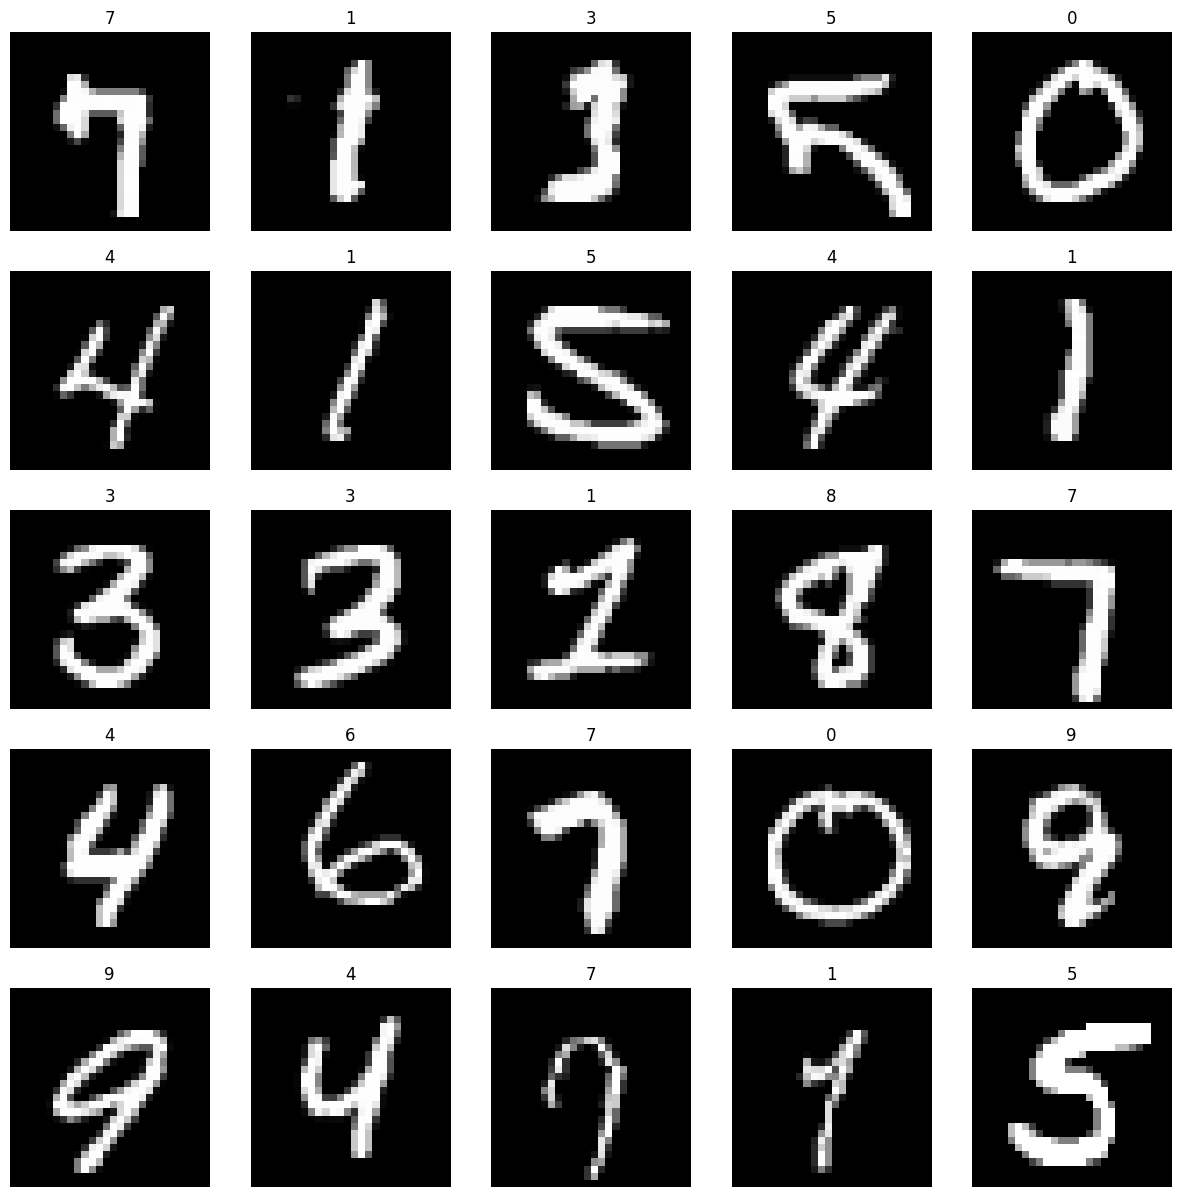

In [100]:
pltsize = 3
row_images = 5
col_images = 5
plt.figure(figsize=(col_images * pltsize, row_images * pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, dataset.shape[0])
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')

    plt.imshow((dataset.iloc[i_rand, 1:]).values.reshape(28,28),
               cmap='gray',
               vmin=0, vmax=255)

    plt.title((str(dataset.iloc[i_rand, 0])))
plt.show()

#### Prepare Data for Modelling
To preapre the data for use in a neural network we have to do three jobs:

1. Split the data into ``X`` (descriptive features) and ``y`` (target feature values) arrays.
2. Scale the data to the range -1 to 1
3. Split the data into **train**, **validation**, and **test** partitions.
4. Convert the target values to wide vector representations.

Split the data frame into descriptive featues (``X``) and target feature (``y``).

In [101]:
X = dataset.loc[:, dataset.columns != 'label']
y = dataset["label"]

Rescale the data so that all columns are in the range -1 to 1. We do this directly here rather than with a min-max scalar because we know the pixel values are between 0 and 255 and we don't want to scale different features independently.

In [102]:
X = X / 255
X = X * 2
X = X - 1

In [103]:
X.head()

,Px0,Px1,Px2,Px3,Px4,Px5,Px6,Px7,Px8,Px9,Px10,Px11,Px12,Px13,Px14,Px15,Px16,Px17,Px18,Px19,Px20,Px21,Px22,Px23,Px24,Px25,Px26,Px27,Px28,Px29,Px30,Px31,Px32,Px33,Px34,Px35,Px36,Px37,Px38,Px39,Px40,Px41,Px42,Px43,Px44,Px45,Px46,Px47,Px48,Px49,Px50,Px51,Px52,Px53,Px54,Px55,Px56,Px57,Px58,Px59,Px60,Px61,Px62,Px63,Px64,Px65,Px66,Px67,Px68,Px69,Px70,Px71,Px72,Px73,Px74,Px75,Px76,Px77,Px78,Px79,Px80,Px81,Px82,Px83,Px84,Px85,Px86,Px87,Px88,Px89,Px90,Px91,Px92,Px93,Px94,Px95,Px96,Px97,Px98,Px99,Px100,Px101,Px102,Px103,Px104,Px105,Px106,Px107,Px108,Px109,Px110,Px111,Px112,Px113,Px114,Px115,Px116,Px117,Px118,Px119,Px120,Px121,Px122,Px123,Px124,Px125,Px126,Px127,Px128,Px129,Px130,Px131,Px132,Px133,Px134,Px135,Px136,Px137,Px138,Px139,Px140,Px141,Px142,Px143,Px144,Px145,Px146,Px147,Px148,Px149,Px150,Px151,Px152,Px153,Px154,Px155,Px156,Px157,Px158,Px159,Px160,Px161,Px162,Px163,Px164,Px165,Px166,Px167,Px168,Px169,Px170,Px171,Px172,Px173,Px174,Px175,Px176,Px177,Px178,Px179,Px180,Px181,Px182,Px183,Px184,Px185,Px186,Px187,Px188,Px189,Px190,Px191,Px192,Px193,Px194,Px195,Px196,Px197,Px198,Px199,Px200,Px201,Px202,Px203,Px204,Px205,Px206,Px207,Px208,Px209,Px210,Px211,Px212,Px213,Px214,Px215,Px216,Px217,Px218,Px219,Px220,Px221,Px222,Px223,Px224,Px225,Px226,Px227,Px228,Px229,Px230,Px231,Px232,Px233,Px234,Px235,Px236,Px237,Px238,Px239,Px240,Px241,Px242,Px243,Px244,Px245,Px246,Px247,Px248,Px249,Px250,Px251,Px252,Px253,Px254,Px255,Px256,Px257,Px258,Px259,Px260,Px261,Px262,Px263,Px264,Px265,Px266,Px267,Px268,Px269,Px270,Px271,Px272,Px273,Px274,Px275,Px276,Px277,Px278,Px279,Px280,Px281,Px282,Px283,Px284,Px285,Px286,Px287,Px288,Px289,Px290,Px291,Px292,Px293,Px294,Px295,Px296,Px297,Px298,Px299,Px300,Px301,Px302,Px303,Px304,Px305,Px306,Px307,Px308,Px309,Px310,Px311,Px312,Px313,Px314,Px315,Px316,Px317,Px318,Px319,Px320,Px321,Px322,Px323,Px324,Px325,Px326,Px327,Px328,Px329,Px330,Px331,Px332,Px333,Px334,Px335,Px336,Px337,Px338,Px339,Px340,Px341,Px342,Px343,Px344,Px345,Px346,Px347,Px348,Px349,Px350,Px351,Px352,Px353,Px354,Px355,Px356,Px357,Px358,Px359,Px360,Px361,Px362,Px363,Px364,Px365,Px366,Px367,Px368,Px369,Px370,Px371,Px372,Px373,Px374,Px375,Px376,Px377,Px378,Px379,Px380,Px381,Px382,Px383,Px384,Px385,Px386,Px387,Px388,Px389,Px390,Px391,Px392,Px393,Px394,Px395,Px396,Px397,Px398,Px399,Px400,Px401,Px402,Px403,Px404,Px405,Px406,Px407,Px408,Px409,Px410,Px411,Px412,Px413,Px414,Px415,Px416,Px417,Px418,Px419,Px420,Px421,Px422,Px423,Px424,Px425,Px426,Px427,Px428,Px429,Px430,Px431,Px432,Px433,Px434,Px435,Px436,Px437,Px438,Px439,Px440,Px441,Px442,Px443,Px444,Px445,Px446,Px447,Px448,Px449,Px450,Px451,Px452,Px453,Px454,Px455,Px456,Px457,Px458,Px459,Px460,Px461,Px462,Px463,Px464,Px465,Px466,Px467,Px468,Px469,Px470,Px471,Px472,Px473,Px474,Px475,Px476,Px477,Px478,Px479,Px480,Px481,Px482,Px483,Px484,Px485,Px486,Px487,Px488,Px489,Px490,Px491,Px492,Px493,Px494,Px495,Px496,Px497,Px498,Px499,Px500,Px501,Px502,Px503,Px504,Px505,Px506,Px507,Px508,Px509,Px510,Px511,Px512,Px513,Px514,Px515,Px516,Px517,Px518,Px519,Px520,Px521,Px522,Px523,Px524,Px525,Px526,Px527,Px528,Px529,Px530,Px531,Px532,Px533,Px534,Px535,Px536,Px537,Px538,Px539,Px540,Px541,Px542,Px543,Px544,Px545,Px546,Px547,Px548,Px549,Px550,Px551,Px552,Px553,Px554,Px555,Px556,Px557,Px558,Px559,Px560,Px561,Px562,Px563,Px564,Px565,Px566,Px567,Px568,Px569,Px570,Px571,Px572,Px573,Px574,Px575,Px576,Px577,Px578,Px579,Px580,Px581,Px582,Px583,Px584,Px585,Px586,Px587,Px588,Px589,Px590,Px591,Px592,Px593,Px594,Px595,Px596,Px597,Px598,Px599,Px600,Px601,Px602,Px603,Px604,Px605,Px606,Px607,Px608,Px609,Px610,Px611,Px612,Px613,Px614,Px615,Px616,Px617,Px618,Px619,Px620,Px621,Px622,Px623,Px624,Px625,Px626,Px627,Px628,Px629,Px630,Px631,Px632,Px633,Px634,Px635,Px636,Px637,Px638,Px639,Px640,Px641,Px642,Px643,Px644,Px645,Px646,Px647,Px648,Px649,Px650,Px651,Px652,Px653,Px654,Px655,Px656,Px657,Px658,Px659,Px660,Px661,Px662,Px663,Px664,Px665,Px666,Px667,Px668,Px669,Px670,Px671,Px672,Px673,Px674,Px675,Px676,Px677,Px678,Px679,Px680,Px681,Px682,Px683,Px684

Partition the dataset **training** (50%), **validation** (20%) and **test** (30%) sets, using the ``train_test_split`` method from ``pandas``.

In [104]:
X_train_plus_valid, X_test, y_train_plus_valid, y_test = sklearn.model_selection.train_test_split(X, y,
                                                                                                  random_state=0,
                                                                                                  test_size=0.30,
                                                                                                  train_size=0.7,
                                                                                                  stratify=y)

X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X_train_plus_valid, y_train_plus_valid,
                                                                              random_state=0,
                                                                              train_size=0.5/0.7,
                                                                              stratify=y_train_plus_valid)

Examine the sizes of the partitions created.

In [105]:
display(X_train.shape)
display(X_valid.shape)
display(X_test.shape)

(9000, 784)

(3600, 784)

(5400, 784)

In [106]:
display(y_train.shape)
display(y_valid.shape)
display(y_test.shape)

(9000,)

(3600,)

(5400,)

To train a neural network for a classification problem with more than two target levels, the target features need to be presented as binary vectors rather than as categories. There are lots of ways to do this, but here we use the ``to_categorical`` function from ``keras``.

| Label | digit_0 | digit_1 | digit_2 | digit_3 | digit_4 | digit_5 | digit_6 | digit_7 | digit_8 | digit_9 |
|-------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| 0     | 1       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       |
| 1     | 0       | 1       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       |
| 2     | 0       | 0       | 1       | 0       | 0       | 0       | 0       | 0       | 0       | 0       |
| 3     | 0       | 0       | 0       | 1       | 0       | 0       | 0       | 0       | 0       | 0       |
| 4     | 0       | 0       | 0       | 0       | 1       | 0       | 0       | 0       | 0       | 0       |
| 5     | 0       | 0       | 0       | 0       | 0       | 1       | 0       | 0       | 0       | 0       |
| 6     | 0       | 0       | 0       | 0       | 0       | 0       | 1       | 0       | 0       | 0       |
| 7     | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 1       | 0       | 0       |
| 8     | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 1       | 0       |
| 9     | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 1       |

In [107]:
y_train_wide = tensorflow.keras.utils.to_categorical(np.asarray(y_train))
y_valid_wide = tensorflow.keras.utils.to_categorical(np.asarray(y_valid))
y_test_wide = tensorflow.keras.utils.to_categorical(np.asarray(y_test))

In [108]:
display(y_train_wide)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

Before modelling it is always a good idea to explore the data after various preparations have been made. In this case because we have images, we view some of them.

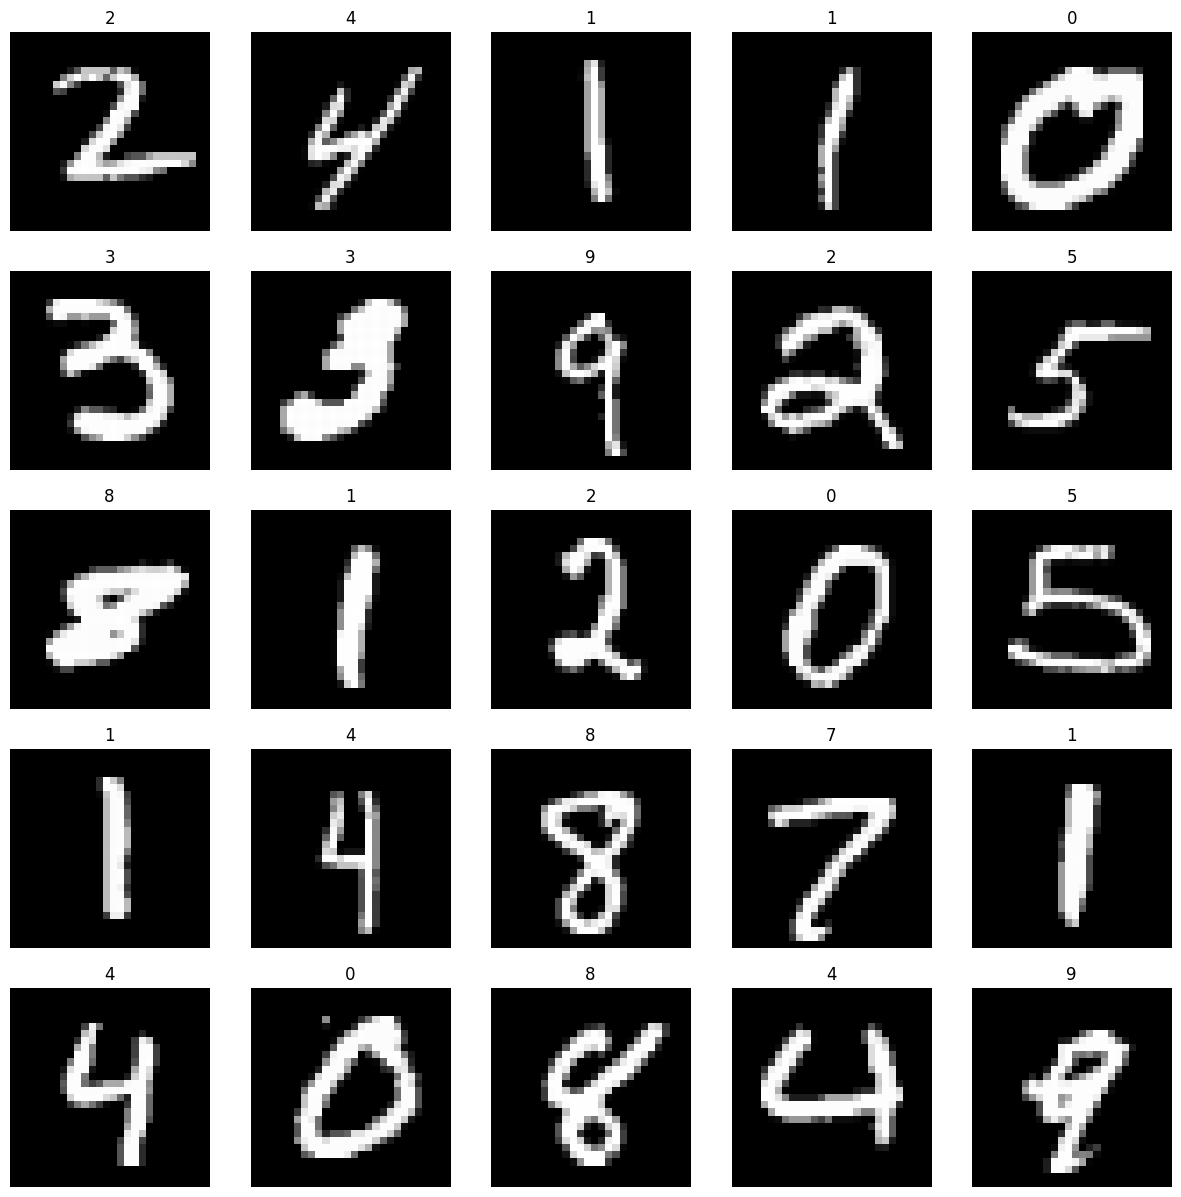

In [109]:
pltsize = 3
row_images = 5
col_images = 5
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, X_train.shape[0])
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')

    plt.imshow((X_train.iloc[i_rand, :]).values.reshape(28,28),
               cmap='gray',
               vmin=-1, vmax=1)

    plt.title((str(y_train.iloc[i_rand])))
plt.show()

### Model Building

When we use neural networks in ``keras`` we directly specify the model architecture. First we make a ``Sequential`` model. Then we add a series of layers to the model using the ``add`` method. For a **multi-layer perceptron** model we use ``Dense`` layers indicating that every node in a layer is connected to every node in the next layer. When we create a layer we indicate the following:

- **units**: The number of units contained in this layer.
- **activation**: The activation function used by nodes in this layer. Typically one of 'linear', 'relu', 'tanh', sigmoid', or 'softmax'.
- **input_shape**: At the first layer of the model we indicate the size of the input vector. Subsequent layers assume that the input will be the same size as the previous layer's output.

We specify the structure of a 5 layer multi-layer perceptron. Note that the input shape is the same as the size of the vectors in the MNIST dataset (784 total pixels) and the size of the output layer matches the number of classes in the dataset (10).

In [110]:
input_shape=(784,)

mlp = tensorflow.keras.models.Sequential()

mlp.add(tensorflow.keras.layers.Input(shape=input_shape))

mlp.add(tensorflow.keras.layers.Dense(512,
                                      activation='relu'))

mlp.add(tensorflow.keras.layers.Dense(512,
                                      activation='relu'))

mlp.add(tensorflow.keras.layers.Dense(256,
                                      activation='relu'))

mlp.add(tensorflow.keras.layers.Dense(56,
                                      activation='relu'))

mlp.add(tensorflow.keras.layers.Dense(10,
                                      activation = 'softmax'))

The ``summary`` method gives nice output summarising the structure of the model.The ``summary`` method gives nice output summarising the structure of the model.

In [111]:
mlp.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 56)                  │          14,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 810,866 (3.09 MB)

 Trainable params: 810,866 (3.09 MB)

 Non-trainable params: 0 (0.00 B)

We have used ``Dense`` layers for every layer of our model in this case, but there are a wide range of choices for the layer type. Keras has a wide range of built-in layer types that you can view [here](https://keras.io/api/layers/).

Some other commonly used layer types include:

- Convolution layers often used in computer vision such as the ``Conv2D`` layer.
- Pooling layers such as the ``MaxPooling1D`` layer to reduce the dimensions of the hidden layer by combining the outputs of the previous layer.
- Recurrent layers such as Long Short-Term Memory, ``LSTM`` layers are often used in time series forecasting.
- Regularization layers such as the ``Droput`` layer used to prevent overfitting.

One other difference when using models from ``keras`` versus models from ``sklearn`` is that we need to compile the model - this is where we set the hyperparameters for the learning process. We call the ``compile`` method on the keras model object, typically settting the following:

- **optimizer**: The optimiser to use during training. Typically one of 'adam', 'rmsprop', or 'sgd' (although there are others).
- **loss**: The loss function to use during training. Typically one of 'mean_squared_error', 'mean_absolute_error', or 'categorical_crossentropy' (although there are others).
- **metrics**: List of metrics to be evaluated by the model during training and testing. For example, 'accuracy', 'auc', 'mean_squared_error', 'precision', 'recall', ...

In [112]:
mlp.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

We train the model using the ``fit`` function (just like in ``sklearn``). The key hyperparameters of the ``fit`` function are:

- **x**: Input data.
- **y**: Target data.
- **batch_size**=32: Number of samples per batch in mini-batch gradient descent.
- **epochs**: Number of epochs to train the model.
- **callbacks**=None: List of keras **Callbacks** to monitor during training.
- **validation_split**=0: A fraction of the training data to use as a validation set for model evaluation during training.
- **validation_data**: Validation set for model evaluation during training. Given as a tuple of descriptive feature and target values (X_valid, y_valid).
- **shuffle**=True: Whether to shuffle the training data before each epoch
- **verbose**:=1: Verbosity mode: 0=silent, 1=progress bar, 2=one line per epoch.

Also note that training a model in ``keras`` returns a history object that gives us information about the progress of training that we can analyse and visualise.

In [92]:
history = mlp.fit(X_train, y_train_wide,
                  epochs=20,
                  batch_size=32,
                  validation_data=(X_valid, y_valid_wide),
                  verbose=1)

Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6909 - loss: 0.9423 - val_accuracy: 0.8961 - val_loss: 0.3377
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9040 - loss: 0.2942 - val_accuracy: 0.9222 - val_loss: 0.2547
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9208 - loss: 0.2259 - val_accuracy: 0.9150 - val_loss: 0.2810
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9405 - loss: 0.1738 - val_accuracy: 0.9222 - val_loss: 0.2602
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9513 - loss: 0.1464 - val_accuracy: 0.9414 - val_loss: 0.2172
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9600 - loss: 0.1291 - val_accuracy: 0.9378 - val_loss: 0.2233
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9667 - loss: 0.1033 - val_accuracy: 0.9364 - val_loss: 0.2473
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9657 - loss: 0.1025 - val_accu

After training we can access the **losses** and other metrics recorded during training through the ``history`` object. It is usually quite informative to plot these.

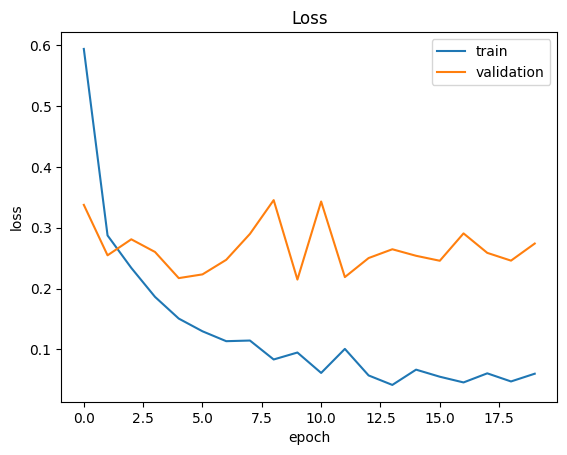

In [113]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

We see some clear evidence of overfitting with the validation loss increasing for the last few epochs. We could retrain the model with less epochs (here 10 seems close to optimal).

In practice we usually use *callbacks*. Callbacks allow us to do things like:
- Periodically saving the model during training so we can go back to an earlier version of the model instead of starting from scratch
- Automatic early stopping if we are beginning to see signs of overfitting
- Viewing internal states and statistics of a model during training

We can implement callbacks quite simply in keras using the [callbacks API](https://keras.io/api/callbacks/).

###  Evaluation

We evaulate the model in the same way as ``sklearn`` models by making predictions and then calcualting performance measures.  Note that the ``predict`` method for ``keras`` models returns a probability for each class, from which we select the maximum to generate a class label. We now do this in two steps as follows:

```python
y_pred = model.predict(np.asfarray(X_train))
y_pred = np.argmax(y_pred, axis=1)
```

******** Training Data ********
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       874
           1       0.00      0.00      0.00      1021
           2       0.17      0.05      0.07       879
           3       0.00      0.00      0.00       926
           4       0.09      0.43      0.14       884
           5       0.00      0.00      0.00       804
           6       0.00      0.00      0.00       882
           7       0.00      0.00      0.00       936
           8       0.10      0.51      0.17       884
           9       0.00      0.00      0.00       910

    accuracy                           0.10      9000
   macro avg       0.04      0.10      0.04      9000
weighted avg       0.04      0.10      0.04      9000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


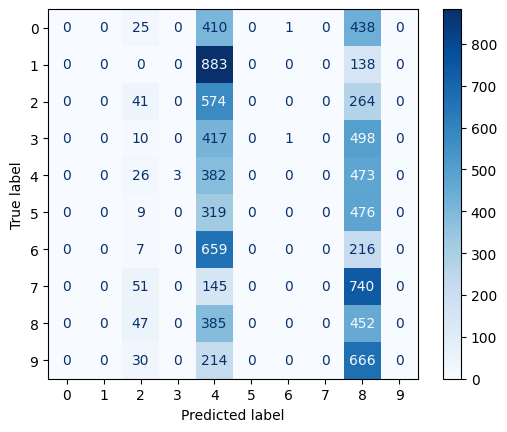

In [114]:
print("******** Training Data ********")
y_pred = mlp.predict(np.asfarray(X_train))
y_pred = np.argmax(y_pred,axis=1)

print(sklearn.metrics.classification_report(y_train, y_pred))
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_pred, cmap='Blues')
plt.show()

****** Validation Data ********
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       350
           1       0.00      0.00      0.00       408
           2       0.16      0.04      0.06       352
           3       0.00      0.00      0.00       370
           4       0.09      0.47      0.15       354
           5       0.00      0.00      0.00       322
           6       0.00      0.00      0.00       353
           7       0.00      0.00      0.00       374
           8       0.10      0.49      0.17       353
           9       0.00      0.00      0.00       364

    accuracy                           0.10      3600
   macro avg       0.04      0.10      0.04      3600
weighted avg       0.03      0.10      0.04      3600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


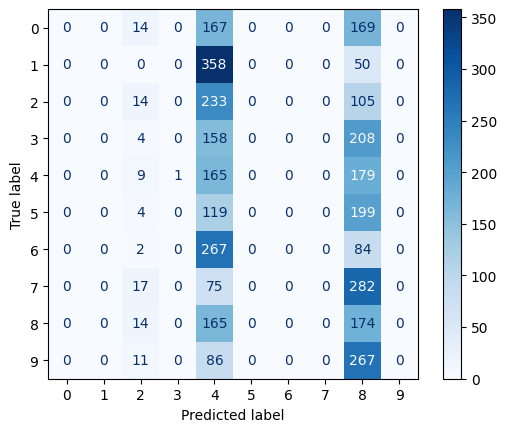

In [115]:
print("****** Validation Data ********")
y_pred = mlp.predict(np.asfarray(X_valid))
y_pred = np.argmax(y_pred,axis=1)

print(sklearn.metrics.classification_report(y_valid, y_pred))
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_valid, y_pred, cmap='Blues')
plt.show()

We can evaluate against the test set.

****** Test Data ********
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       525
           1       0.00      0.00      0.00       612
           2       0.14      0.04      0.06       528
           3       0.00      0.00      0.00       555
           4       0.09      0.42      0.14       530
           5       0.00      0.00      0.00       482
           6       0.00      0.00      0.00       530
           7       0.00      0.00      0.00       562
           8       0.10      0.51      0.17       530
           9       0.00      0.00      0.00       546

    accuracy                           0.10      5400
   macro avg       0.03      0.10      0.04      5400
weighted avg       0.03      0.10      0.04      5400

Confusion Matrix


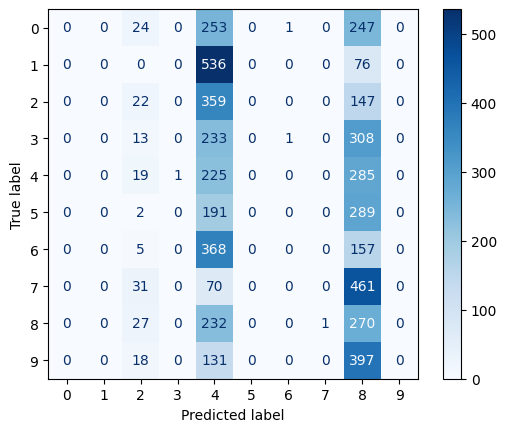

In [116]:
print("****** Test Data ********")

# Make a set of predictions for the validation data
y_pred = mlp.predict(np.asfarray(X_test))
y_pred = np.argmax(y_pred,axis=1)

# Print performance details
print(sklearn.metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

### Optional: Training other Models to Avoid Overfitting

We can try a model that suffers from less overfitting, let's train a second model for only 10 epochs.

In [117]:
second_model = True

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6857 - loss: 0.9223 - val_accuracy: 0.9139 - val_loss: 0.2831
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9028 - loss: 0.2992 - val_accuracy: 0.9069 - val_loss: 0.2967
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9338 - loss: 0.2100 - val_accuracy: 0.8964 - val_loss: 0.3567
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9474 - loss: 0.1701 - val_accuracy: 0.9361 - val_loss: 0.2144
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9604 - loss: 0.1261 - val_accuracy: 0.9389 - val_loss: 0.2186
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9510 - loss: 0.1530 - val_accuracy: 0.9333 - val_loss: 0.2447
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9659 - loss: 0.0984 - val_accuracy: 0.9378 - val_loss: 0.2240
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9712 - loss: 0.0868 - val_accu

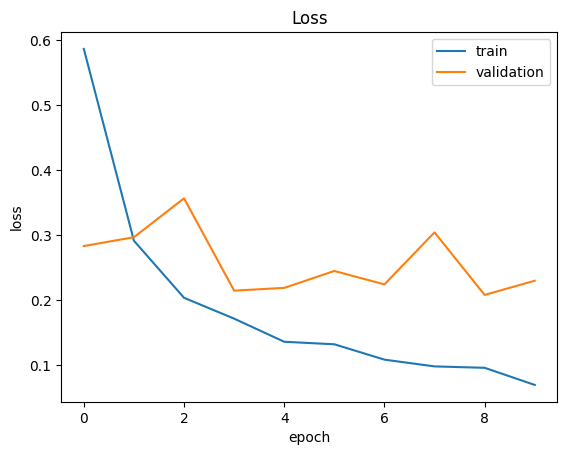

In [118]:
if second_model:
    #Build a new sequential model to train
    mlp2 = tensorflow.keras.models.Sequential()

    mlp2.add(tensorflow.keras.layers.Input(shape=input_shape))

    mlp2.add(tensorflow.keras.layers.Dense(512,
                                          activation='relu'))

    mlp2.add(tensorflow.keras.layers.Dense(512,
                                          activation='relu'))

    mlp2.add(tensorflow.keras.layers.Dense(256,
                                          activation='relu'))

    mlp2.add(tensorflow.keras.layers.Dense(56,
                                          activation='relu'))

    mlp2.add(tensorflow.keras.layers.Dense(10,
                                          activation='softmax'))

    #Compile the model
    mlp2.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    #Fit the model
    history = mlp2.fit(X_train, y_train_wide,
                      epochs=10,
                      batch_size=32,
                      validation_data=(X_valid, y_valid_wide),
                      verbose=1)

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

****** Test Data ********
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       525
           1       0.98      0.97      0.97       612
           2       0.96      0.94      0.95       528
           3       0.92      0.94      0.93       555
           4       0.92      0.97      0.95       530
           5       0.97      0.87      0.92       482
           6       0.95      0.97      0.96       530
           7       0.98      0.95      0.97       562
           8       0.97      0.89      0.93       530
           9       0.88      0.94      0.91       546

    accuracy                           0.94      5400
   macro avg       0.95      0.94      0.94      5400
weighted avg       0.95      0.94      0.94      5400



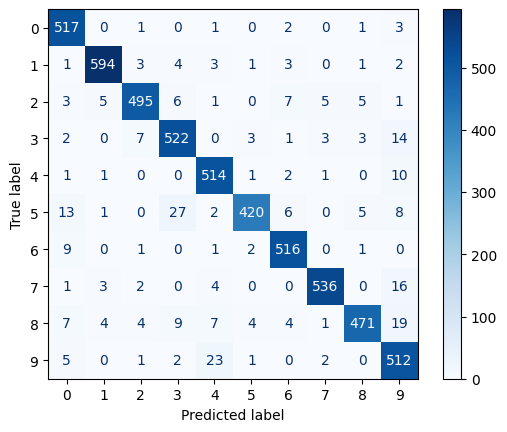

In [119]:
if second_model:
    print("****** Test Data ********")
    y_pred2 = mlp2.predict(np.asfarray(X_test))
    y_pred2 = np.argmax(y_pred2,axis=1)

    print(sklearn.metrics.classification_report(y_test, y_pred2))
    sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, cmap='Blues')

plt.show()

In [120]:
callback_model = True

We are going to use an ``EarlyStopping`` callback to stop training when a monitored metric has stopped improving.

Assuming the goal of training is to minimize the loss. With this, the metric to be monitored would be 'loss', and mode would be 'min'. A ``model.fit()`` training loop will check at end of every epoch whether the loss is no longer decreasing. Once it's found to be no longer decreasing the training terminates.

We typically set some of the following patrameters:
- **monitor**: Quantity to be monitored.
- **min_delta**: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
- **patience**: Number of epochs with no improvement after which training will be stopped.
- **restore_best_weights**: Whether to restore model weights from the epoch with the best value of the monitored quantity.

In [121]:
if callback_model:
    callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

Epoch 1/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6708 - loss: 1.0011 - val_accuracy: 0.8792 - val_loss: 0.3810
Epoch 2/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8928 - loss: 0.3341 - val_accuracy: 0.9136 - val_loss: 0.2852
Epoch 3/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9334 - loss: 0.2023 - val_accuracy: 0.9294 - val_loss: 0.2319
Epoch 4/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9505 - loss: 0.1579 - val_accuracy: 0.9406 - val_loss: 0.1968
Epoch 5/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9581 - loss: 0.1345 - val_accuracy: 0.9317 - val_loss: 0.2321
Epoch 6/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9536 - loss: 0.1510 - val_accuracy: 0.9408 - val_loss: 0.1924
Epoch 7/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9639 - loss: 0.1079 - val_accuracy: 0.9400 - val_loss: 0.2228
Epoch 8/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9655 - loss: 0.1031 - val_acc

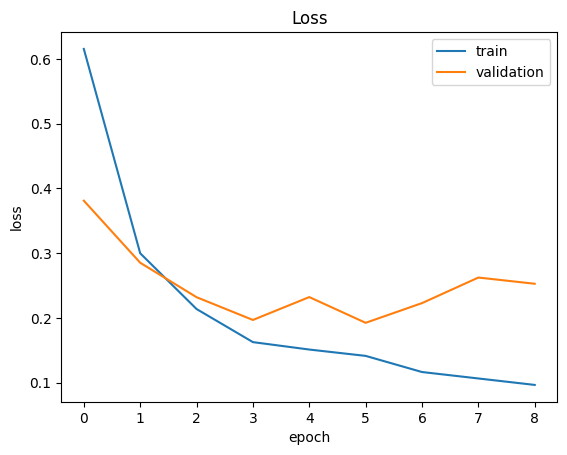

In [122]:
if callback_model:
    #Build a new sequential model to train
    mlp_c = tensorflow.keras.models.Sequential()

    mlp_c.add(tensorflow.keras.layers.Input(shape=input_shape))

    mlp_c.add(tensorflow.keras.layers.Dense(512,
                                          activation='relu'))

    mlp_c.add(tensorflow.keras.layers.Dense(512,
                                          activation='relu'))

    mlp_c.add(tensorflow.keras.layers.Dense(256,
                                          activation='relu'))

    mlp_c.add(tensorflow.keras.layers.Dense(56,
                                          activation='relu'))

    mlp_c.add(tensorflow.keras.layers.Dense(10,
                                          activation='softmax'))

    #Compile the model
    mlp_c.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    #Fit the model
    history = mlp_c.fit(X_train, y_train_wide,
                      epochs=30,
                      batch_size=32,
                      validation_data=(X_valid, y_valid_wide),
                      verbose=1,
                      callbacks=[callback])

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

****** Test Data ********
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       525
           1       0.93      0.98      0.96       612
           2       0.95      0.92      0.93       528
           3       0.92      0.93      0.92       555
           4       0.97      0.94      0.96       530
           5       0.96      0.90      0.93       482
           6       0.93      0.98      0.96       530
           7       0.94      0.97      0.95       562
           8       0.96      0.92      0.94       530
           9       0.91      0.93      0.92       546

    accuracy                           0.94      5400
   macro avg       0.95      0.94      0.94      5400
weighted avg       0.94      0.94      0.94      5400



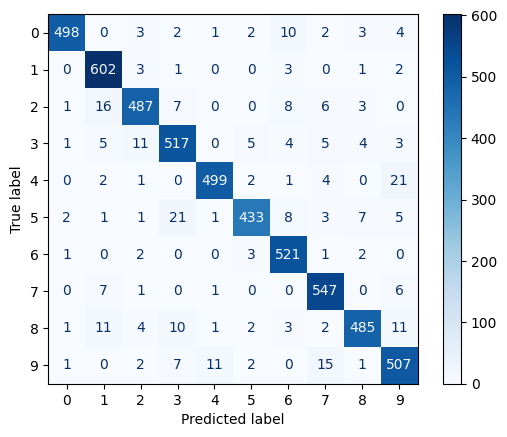

In [123]:
if callback_model:
    print("****** Test Data ********")
    y_pred_c = mlp_c.predict(np.asfarray(X_test))
    y_pred_c = np.argmax(y_pred_c,axis=1)

    print(sklearn.metrics.classification_report(y_test, y_pred_c))
    sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_c, cmap='Blues')

plt.show()



****** Test Data ********
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       525
           1       0.93      0.98      0.96       612
           2       0.95      0.92      0.93       528
           3       0.92      0.93      0.92       555
           4       0.97      0.94      0.96       530
           5       0.96      0.90      0.93       482
           6       0.93      0.98      0.96       530
           7       0.94      0.97      0.95       562
           8       0.96      0.92      0.94       530
           9       0.91      0.93      0.92       546

    accuracy                           0.94      5400
   macro avg       0.95      0.94      0.94      5400
weighted avg       0.94      0.94      0.94      5400



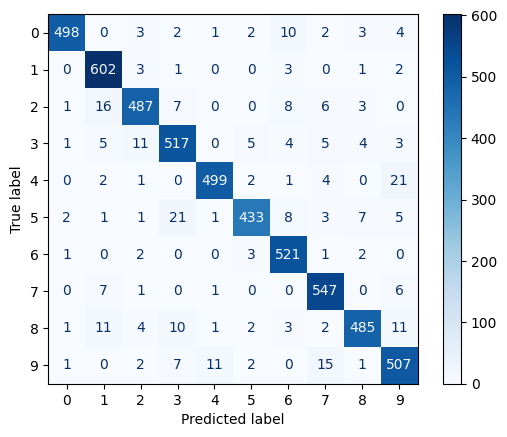

Model saved to /content/drive/My Drive/Demo_Lecture/Data/model.h5


In [124]:
if callback_model:
    print("****** Test Data ********")
    y_pred_c = mlp_c.predict(np.asfarray(X_test))
    y_pred_c = np.argmax(y_pred_c, axis=1)

    print(sklearn.metrics.classification_report(y_test, y_pred_c))
    sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_c, cmap='Blues')
    plt.show()

    # Save the model to a specified path in Google Drive
    model_path = '/content/drive/My Drive/Demo_Lecture/Data/model.h5'
    mlp_c.save(model_path)
    print(f"Model saved to {model_path}")


### Deployment

``gradio`` is a fantastic Python package that allows us to easily put web-based front ends on to machine learning models. Here we make a simple app that creates a canvas onto which users can draw digits which are then presented to the model for classification.

In [125]:
def predict(img):
    img = img.reshape(1,784)/255.0
    prediction = mlp.predict(img)[0]
    return int(prediction)

In [126]:
gr.Interface(fn= predict, inputs = "sketchpad", outputs ="label").launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://087b68989219f43484.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
